In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate

In [2]:
from toy_tools import *

In [43]:
def run(extrapolate=False):
    pos = 8700
    q = 30_600
    delay = 15
    thres = 6_000
    roi = 5*delay
    npoints = 10_000
    
    unit_fr = load_fr_ctr('response_44_v2a_100ns.npy')
    q0 = q*np.ones(1)
    # from toy_translation.ipynb
    r = 20
    sigma = 2
    q1 = q_gaus(q=q, r=21, sigma=sigma)
    fr0 = fr_record(q0, pos, unit_fr)
    fr1 = fr_record(q1, pos, unit_fr)

    r0 = readout(fr0, thres=thres, delay=delay)
    r1 = readout(fr1, thres=thres, delay=delay)

    r0_smooth = smooth_wf(wf=r0, thres=thres, roi=roi, delay=delay, npoints=npoints, extrapolate=extrapolate)
    r1_smooth = smooth_wf(wf=r1, thres=thres, roi=roi, delay=delay, npoints=npoints, extrapolate=extrapolate)

    r0_fft = np.fft.fft(np.add.accumulate(r0_smooth), n=npoints)
    r1_fft = np.fft.fft(np.add.accumulate(r1_smooth), n=npoints)

    fr_fft = np.fft.fft(np.add.accumulate(unit_fr), n=npoints)

    q0_ifft = np.fft.ifft(r0_fft/fr_fft)
    q1_ifft = np.fft.ifft(r1_fft/fr_fft)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    # ax0.bar(, np.add.accumulate(r0[1]), width=delay, color='r', align='edge', label='readout')
    ax0.plot([pos], q0)
    ax0.plot(q0_ifft, linestyle='--')
    # ax1.bar(r0[0], r0[1], width=delay, color='r', align='edge', label='readout')
    # ax1.plot(r0_smooth)
    # ax0.set_xlim(800, 1300)
    # ax1.set_xlim(1100, 1300)

    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    ax0.plot(np.add.accumulate(np.append(np.zeros(pos-len(q1)),q1)))
    ax0.plot(q1_ifft, linestyle='--')
    ax1.plot(np.append(np.zeros(pos-len(q1)),q1))
    ax1.plot(np.diff(q1_ifft), linestyle='--')
    ax1.set_xlim(8650, 8750)

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
17.0
[1179. 1196.]
[[1104, 1179, 6000], [1179, 1194, 12770.612597685362], [1194, 1196, 6000], [1196, 1211, 3566.283843871779]]
18.0
[1189. 1207.]
[[1114, 1189, 6000], [1189, 1204, 13428.274903172776], [1204, 1207, 6000], [1207, 1222, 2952.5563540967305]]


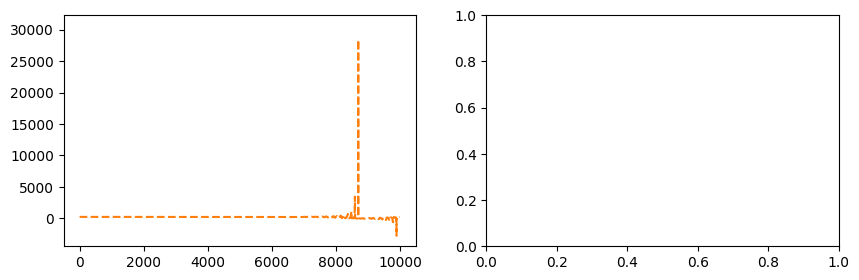

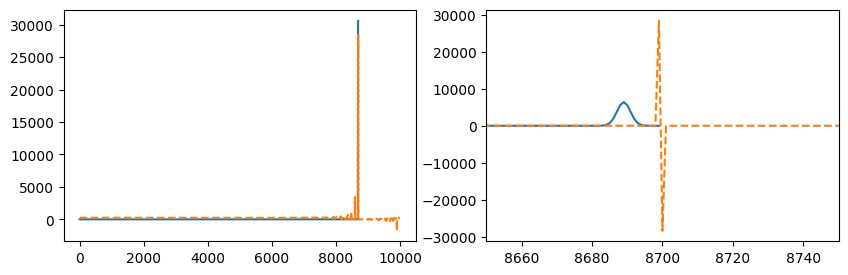

In [44]:
run()